### Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Loading data
air_quality_data = pd.read_csv('data.csv')
air_quality_data

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp,RH,AH,Day,Month
0,2004-03-10,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,3
1,2004-03-10,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,3
2,2004-03-10,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,3
3,2004-03-10,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,3
4,2004-03-10,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,3
5,2004-03-11,8,2.0,1333.0,8.0,900.0,174.0,1136.0,112.0,1517.0,1102.0,10.8,57.4,0.7408,Thursday,3
6,2004-03-11,9,2.2,1351.0,9.5,960.0,129.0,1079.0,101.0,1583.0,1028.0,10.5,60.6,0.7691,Thursday,3
7,2004-03-11,10,1.7,1233.0,6.3,827.0,112.0,1218.0,98.0,1446.0,860.0,10.8,58.4,0.7552,Thursday,3
8,2004-03-11,12,1.6,1236.0,5.2,774.0,104.0,1301.0,95.0,1401.0,664.0,9.5,66.8,0.7951,Thursday,3
9,2004-03-11,13,1.9,1286.0,7.3,869.0,146.0,1162.0,112.0,1537.0,799.0,8.3,76.4,0.8393,Thursday,3


## Part A  
#### Cluster your data: Use at least two methods to cluster your data.  

Partitioning-based clustering (K-means and its variants) 

In [2]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [3]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=5)
X = air_quality_data[["CO(GT)","PT08.S1(CO)"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)
print(Counter(labels))

[4 4 0 ... 3 1 1]
Counter({1: 1609, 3: 1408, 2: 1240, 4: 1001, 0: 573})


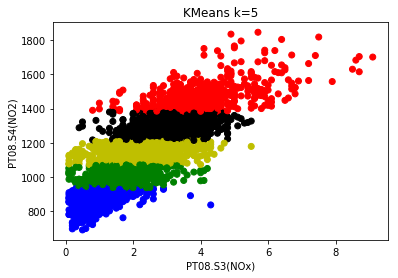

In [4]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(air_quality_data['CO(GT)'], air_quality_data['PT08.S1(CO)'], c=colors)
plt.title("KMeans k=5")
plt.xlabel('PT08.S3(NOx)')
plt.ylabel('PT08.S4(NO2)')
plt.show()

#### K-means evaluation

In [5]:
# silhouette coefficient
from sklearn import metrics

print(metrics.silhouette_score(X, labels, metric='euclidean'))

0.5350790757325091


#### Scaling K-means

In [6]:
from sklearn.preprocessing import scale

[[ 0.47732344  1.34639937]
 [-0.02779249  0.99062701]
 [ 0.14057949  1.56614112]
 ...
 [ 0.30895146  0.20583505]
 [ 0.0563935  -0.52140549]
 [ 0.14057949 -0.16563314]]
[ 0.47732344 -0.02779249  0.14057949 ...  0.30895146  0.0563935
  0.14057949]
[ 1.34639937  0.99062701  1.56614112 ...  0.20583505 -0.52140549
 -0.16563314]
[0 1 0 ... 1 2 1]
Counter({2: 1701, 1: 1432, 4: 1425, 0: 978, 3: 295})


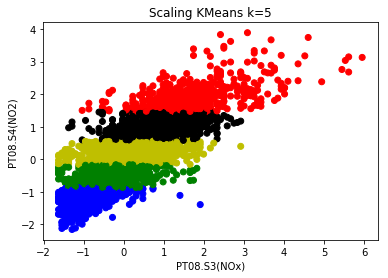

In [7]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=5)
X = air_quality_data[["CO(GT)","PT08.S1(CO)"]]

scaler = scale(X)
scaler1 = scale(air_quality_data["CO(GT)"])
scaler2 = scale(air_quality_data["PT08.S1(CO)"])
print(scaler)
print(scaler1)
print(scaler2)

estimator.fit(scaler)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)
print(Counter(labels))

plt.scatter(scaler1, scaler2, c=colors)
plt.title("Scaling KMeans k=5")
plt.xlabel('PT08.S3(NOx)')
plt.ylabel('PT08.S4(NO2)')
plt.show()

#### Scaling K-means evaluation

In [8]:
print(metrics.silhouette_score(scaler, labels, metric='euclidean'))

0.38252744086211193


#### Density-based clustering(DBSCAN)

[-1  4 -1 ...  0  0  0]
Counter({0: 4301, -1: 634, 1: 229, 3: 219, 14: 108, 6: 52, 5: 35, 7: 28, 9: 24, 4: 21, 19: 21, 16: 19, 8: 17, 13: 16, 2: 14, 10: 14, 12: 14, 17: 13, 11: 11, 18: 11, 21: 10, 20: 10, 15: 10})


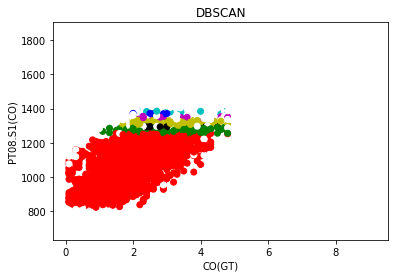

In [9]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1.2, min_samples=10)
X = air_quality_data[["CO(GT)","PT08.S1(CO)"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(air_quality_data["CO(GT)"], air_quality_data["PT08.S1(CO)"], c=colors)
plt.title("DBSCAN")
plt.xlabel("CO(GT)")
plt.ylabel("PT08.S1(CO)")
plt.show()

#### DBSCAN cluster evaluation

In [10]:
print(metrics.silhouette_score(X, labels, metric='euclidean'))

-0.043859736131610344


#### Scaling density-based clustering(DBSCAN)

[[ 0.47732344  1.34639937]
 [-0.02779249  0.99062701]
 [ 0.14057949  1.56614112]
 ...
 [ 0.30895146  0.20583505]
 [ 0.0563935  -0.52140549]
 [ 0.14057949 -0.16563314]]
[ 0.47732344 -0.02779249  0.14057949 ...  0.30895146  0.0563935
  0.14057949]
[ 1.34639937  0.99062701  1.56614112 ...  0.20583505 -0.52140549
 -0.16563314]
[0 0 0 ... 0 0 0]
Counter({0: 5830, -1: 1})


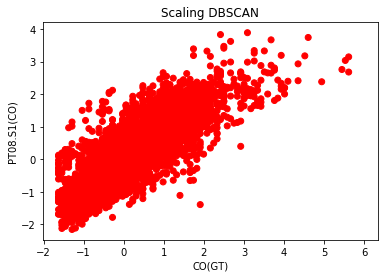

In [11]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=01.2, min_samples=10)
X = air_quality_data[["CO(GT)","PT08.S1(CO)"]]

scaler = scale(X)
scaler1 = scale(air_quality_data["CO(GT)"])
scaler2 = scale(air_quality_data["PT08.S1(CO)"])
print(scaler)
print(scaler1)
print(scaler2)

estimator.fit(scaler)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(scaler1, scaler2, c=colors)
plt.title("Scaling DBSCAN")
plt.xlabel("CO(GT)")
plt.ylabel("PT08.S1(CO)")
plt.show()

#### Scaling DBSCAN cluster evaluation

In [12]:
print(metrics.silhouette_score(scaler, labels, metric='euclidean'))

0.7312965797354826


#### Hierarchical clustering 

Counter({0: 2167, 4: 1362, 3: 1057, 2: 878, 1: 367})


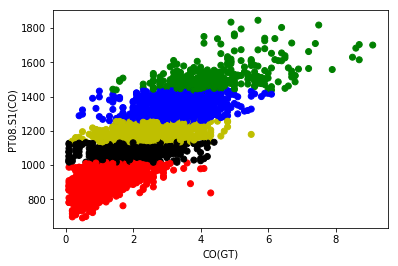

In [13]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=5)
X = air_quality_data[["CO(GT)","PT08.S1(CO)"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(air_quality_data["CO(GT)"], air_quality_data["PT08.S1(CO)"], c=colors)
plt.xlabel("CO(GT)")
plt.ylabel("PT08.S1(CO)")
plt.show()

#### Hierarchical cluster evaluation

In [14]:
print(metrics.silhouette_score(X, labels, metric='euclidean'))

0.504512612181622


#### Scaling Hierarchical clustering

[[ 0.47732344  1.34639937]
 [-0.02779249  0.99062701]
 [ 0.14057949  1.56614112]
 ...
 [ 0.30895146  0.20583505]
 [ 0.0563935  -0.52140549]
 [ 0.14057949 -0.16563314]]
[ 0.47732344 -0.02779249  0.14057949 ...  0.30895146  0.0563935
  0.14057949]
[ 1.34639937  0.99062701  1.56614112 ...  0.20583505 -0.52140549
 -0.16563314]
Counter({1: 2001, 3: 1600, 2: 863, 4: 712, 0: 655})


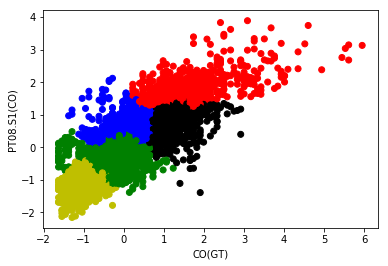

In [15]:
# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=5)
X = air_quality_data[["CO(GT)","PT08.S1(CO)"]]

scaler = scale(X)
scaler1 = scale(air_quality_data["CO(GT)"])
scaler2 = scale(air_quality_data["PT08.S1(CO)"])
print(scaler)
print(scaler1)
print(scaler2)

estimator.fit(scaler)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(scaler1, scaler2, c=colors)
plt.xlabel("CO(GT)")
plt.ylabel("PT08.S1(CO)")
plt.show()

#### Scaling hierarchical cluster evaluation

In [16]:
print(metrics.silhouette_score(scaler, labels, metric='euclidean'))

0.34095475395469366


#### Answer the following questions for the clustering:
* Do the clustering methods generate the same clusters?  
  
No, various clustering methods generate different clusters. I find that the K-means and hierarchical clustering would generate very similar cluster with same number of clusters. However, clusters the DBSCAN generates are so different.

* Does scaling effect the clustering?  
  
Yes, the scaling affect the clustering. Frow the visual side, diagrams of scaling and non-scaling K-means are almost same one. However, to hierarchical clustering and DBSCAN, the diagram of scaling and non-scaling are different. Otherwise, the silhouette coefficient are all various. 

* Does the clustering produce interesting groupings?  
  
Yes, I think the K-means and hierarchical culstering would generate more obvious groupings, which is more distinguishable. Otherwise, the clusters from DBSCAN is hard to separate one cluster from others.

## Part B  
#### Generate a linear model for your data: Find a significant linear relation of your choosing in your data. Create a multivariate (multiple independent variable) linear model.

In [17]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

F:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
air_quality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,5831.0,11.924713,6.976289,0.0000,6.00000,12.000,18.00000,23.0000
CO(GT),5831.0,2.033013,1.187948,0.1000,1.10000,1.800,2.70000,9.1000
PT08.S1(CO),5831.0,1102.658035,191.149848,691.0000,956.50000,1077.000,1228.00000,1846.0000
C6H6(GT),5831.0,9.608421,5.969737,0.2000,4.90000,8.400,13.40000,43.0000
PT08.S2(NMHC),5831.0,931.984222,226.964077,390.0000,758.50000,917.000,1098.00000,1831.0000
NOx(GT),5831.0,240.973589,180.665329,10.0000,110.00000,188.000,323.00000,1230.0000
PT08.S3(NOx),5831.0,817.118676,222.640072,330.0000,661.00000,797.000,947.00000,2683.0000
NO2(GT),5831.0,114.170468,45.157507,19.0000,82.00000,110.000,140.00000,333.0000
PT08.S4(NO2),5831.0,1401.494426,317.955248,551.0000,1172.00000,1417.000,1632.00000,2158.0000
PT08.S5(O3),5831.0,1036.365975,364.243930,221.0000,774.00000,999.000,1272.00000,2494.0000


#### Linear regression

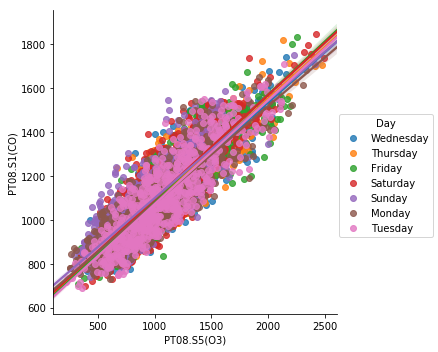

In [19]:
sns.lmplot(x = "PT08.S5(O3)", y = "PT08.S1(CO)", data = air_quality_data, hue = "Day")

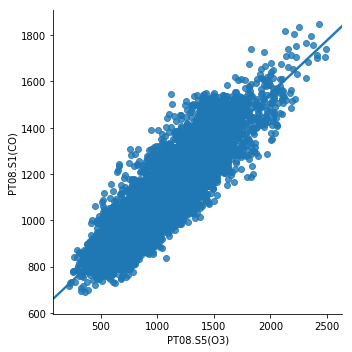

In [20]:
sns.lmplot(x = "PT08.S5(O3)", y = "PT08.S1(CO)", data = air_quality_data)

In [21]:
# from sklearn import linear_model
x = air_quality_data[["PT08.S5(O3)"]]
y = air_quality_data[["PT08.S1(CO)"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(x, y)

# Print the coefficients
print(results.intercept_, results.coef_)

[625.43323762] [[0.46047903]]


In [22]:
# requires from statsmodels.formula.api import ols
o3co = ols("y ~ x", data = air_quality_data).fit()
o3co.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 1.951e+04
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:13:16   Log-Likelihood:                -34620.
No. Observations:                5831   AIC:                         6.924e+04
Df Residuals:                    5829   BIC:                         6.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    625.4332      3.622    172.693      0.000     618.333     632.533
x              0.4605      0.003    139.670      0.000       0.454       0.467
==============================================================================
Omnibus:                      111.840   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.029
Skew:                           0.340   Prob(JB):                     2.35e-26
Kurtosis:                       3.152   Cond. No.                     3.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the OLS regression, I can get $y = 0.46 + 625.43x$, where x means PT08.S5(O3) and y means PT08.S1(CO).

#### multivariate (multiple independent variable) linear model

In [23]:
# from sklearn import linear_model
x = air_quality_data[['CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Temp',\
                      'RH', 'AH']]
y = air_quality_data[["PT08.S1(CO)"]]

# requires from statsmodels.formula.api import ols
results = ols("y ~ x", data = air_quality_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3163.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:13:16   Log-Likelihood:                -33240.
No. Observations:                5831   AIC:                         6.650e+04
Df Residuals:                    5819   BIC:                         6.658e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    711.9969     24.097     29.547      0.000     664.758     759.236
x[0]          31.4557      2.267     13.873      0.000      27.011      35.901
x[1]           5.5250      1.163      4.750      0.000       3.245       7.805
x[2]          -0.1690      0.034     -5.010      0.000      -0.235      -0.103
x[3]          -0.0200      0.015     -1.332      0.183      -0.049       0.009
x[4]          -0.1612      0.009    -17.944      0.000      -0.179      -0.144
x[5]           0.2608      0.045      5.759      0.000       0.172       0.350
x[6]           0.2228      0.012     18.992      0.000       0.200       0.246
x[7]           0.1973      0.007     30.320      0.000       0.185       0.210
x[8]           2.4493      0.483      5.072      0.000       1.503       3.396
x[9]           2.1863      0.170     12.828      0.000       1.852       2.520
x[10]       -136.3970      9.044    -15.082      0.000    -154.127    -118.667
==============================================================================
Omnibus:                      151.357   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.282
Skew:                           0.341   Prob(JB):                     4.32e-40
Kurtosis:                       3.531   Cond. No.                     5.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the OLS regression summary above, I can find that the p-value of $x_{3}$\('NOx(GT)') is about 0.18, which means that the null hypothese could not be rejected, so I remove $x_{3}$ to do regression again.

In [24]:
# from sklearn import linear_model
x = air_quality_data[['CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Temp',\
                      'RH', 'AH']]
y = air_quality_data[["PT08.S1(CO)"]]

# requires from statsmodels.formula.api import ols
results = ols("y ~ x", data = air_quality_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3478.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:13:16   Log-Likelihood:                -33240.
No. Observations:                5831   AIC:                         6.650e+04
Df Residuals:                    5820   BIC:                         6.658e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    711.7685     24.098     29.537      0.000     664.528     759.009
x[0]          30.8127      2.216     13.907      0.000      26.469      35.156
x[1]           5.1554      1.130      4.564      0.000       2.941       7.370
x[2]          -0.1725      0.034     -5.131      0.000      -0.238      -0.107
x[3]          -0.1621      0.009    -18.100      0.000      -0.180      -0.145
x[4]           0.2426      0.043      5.619      0.000       0.158       0.327
x[5]           0.2327      0.009     25.571      0.000       0.215       0.251
x[6]           0.1955      0.006     30.699      0.000       0.183       0.208
x[7]           2.3871      0.481      4.966      0.000       1.445       3.329
x[8]           2.1289      0.165     12.910      0.000       1.806       2.452
x[9]        -138.2077      8.942    -15.456      0.000    -155.737    -120.678
==============================================================================
Omnibus:                      151.269   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.917
Skew:                           0.341   Prob(JB):                     5.18e-40
Kurtosis:                       3.529   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the OLS regression, I can get $$y=711.77+30.81x_{0}+5.16x_{1}-0.17x_{2}-0.16x_{3}+0.24x_{4}+0.23x_{5}+0.2x_{6}+2.39x_{7}+2.13x_{8}-138.21x_{9}$$, where $x_{0}$ means 'CO(GT)', $x_{1}$ means 'C6H6(GT)', $x_{2}$ means 'PT08.S2(NMHC)', $x_{3}$ means 'PT08.S3(NOx)', $x_{4}$ means 'NO2(GT)', $x_{5}$ means 'PT08.S4(NO2)', $x_{6}$ means 'PT08.S5(O3)', $x_{7}$ means 'Temp', $x_{8}$ means 'RH', $x_{9}$ means 'AH' and y means PT08.S1(CO).

In [66]:
air_quality_data.corr()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp,RH,AH,Month,intercept
Time,1.000000,0.348196,0.276449,0.328051,0.353783,0.209040,-0.252422,0.339763,0.177761,0.189874,0.168588,-0.276445,-0.045272,-0.030118,NaN
CO(GT),0.348196,1.000000,0.840415,0.907732,0.894281,0.768186,-0.706352,0.675266,0.530978,0.827322,0.035617,-0.011973,0.004334,0.025607,NaN
PT08.S1(CO),0.276449,0.840415,1.000000,0.853003,0.856564,0.683172,-0.764868,0.605991,0.598751,0.877462,0.050268,0.128202,0.122760,-0.125990,NaN
C6H6(GT),0.328051,0.907732,0.853003,1.000000,0.987214,0.689196,-0.738034,0.584838,0.705833,0.841754,0.242693,-0.100721,0.165738,0.062860,NaN
PT08.S2(NMHC),0.353783,0.894281,0.856564,0.987214,1.000000,0.672108,-0.769035,0.596160,0.724059,0.847084,0.275936,-0.114325,0.186162,0.077755,NaN
NOx(GT),0.209040,0.768186,0.683172,0.689196,0.672108,1.000000,-0.691127,0.774733,0.115571,0.777827,-0.285811,0.168028,-0.195777,0.009040,NaN
PT08.S3(NOx),-0.252422,-0.706352,-0.764868,-0.738034,-0.769035,-0.691127,1.000000,-0.628416,-0.437079,-0.789653,-0.084010,-0.101386,-0.175730,0.039316,NaN
NO2(GT),0.339763,0.675266,0.605991,0.584838,0.596160,0.774733,-0.628416,1.000000,0.032429,0.675426,-0.259927,-0.109602,-0.412443,-0.279012,NaN
PT08.S4(NO2),0.177761,0.530978,0.598751,0.705833,0.724059,0.115571,-0.437079,0.032429,1.000000,0.492267,0.645570,-0.028409,0.677102,0.170508,NaN
PT08.S5(O3),0.189874,0.827322,0.877462,0.841754,0.847084,0.777827,-0.789653,0.675426,0.492267,1.000000,-0.032602,0.127089,0.053716,-0.011948,NaN


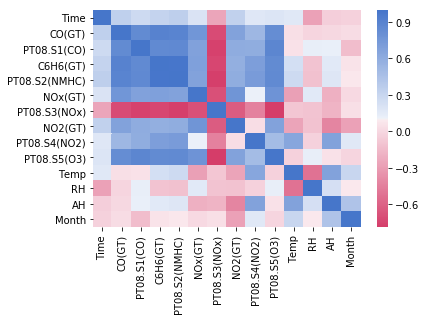

In [25]:
df = air_quality_data.corr()
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
sns.heatmap(df, cmap = cmap)

From the heatmap above, I can know that there is multi-colinearity in the model. I remove some variables to decrease the influence of the multi-colinearity, like C6H6(GT) and PT08.S2(NMHC).

#### Decrease Multi-colinearity

In [26]:
# from sklearn import linear_model
x = air_quality_data[['CO(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Temp', 'RH', 'AH']]
y = air_quality_data[["PT08.S1(CO)"]]

# requires from statsmodels.formula.api import ols
results = ols("y ~ x", data = air_quality_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4326.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:13:17   Log-Likelihood:                -33254.
No. Observations:                5831   AIC:                         6.653e+04
Df Residuals:                    5822   BIC:                         6.659e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    615.6405     15.270     40.317      0.000     585.706     645.575
x[0]          31.3135      1.749     17.908      0.000      27.886      34.741
x[1]          -0.1456      0.008    -18.020      0.000      -0.161      -0.130
x[2]           0.2012      0.042      4.734      0.000       0.118       0.284
x[3]           0.2171      0.007     30.323      0.000       0.203       0.231
x[4]           0.1919      0.006     31.998      0.000       0.180       0.204
x[5]           2.0571      0.477      4.313      0.000       1.122       2.992
x[6]           2.1004      0.163     12.916      0.000       1.782       2.419
x[7]        -130.1080      8.790    -14.802      0.000    -147.340    -112.876
==============================================================================
Omnibus:                      138.884   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.107
Skew:                           0.341   Prob(JB):                     4.65e-35
Kurtosis:                       3.430   Cond. No.                     3.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the OLS regression, I can get $$y=615.64+31.31x_{0}-0.15x_{1}+0.2x_{2}+0.22x_{3}+0.19x_{4}+2.06x_{5}+2.1x_{6}-130.11x_{7}$$, where $x_{0}$ means 'CO(GT)', $x_{1}$ means 'PT08.S3(NOx)', $x_{2}$ means 'NO2(GT)', $x_{3}$ means 'PT08.S4(NO2)', $x_{4}$ means 'PT08.S5(O3)', $x_{5}$ means 'Temp', $x_{6}$ means 'RH', $x_{7}$ means 'AH' and y means PT08.S1(CO).

#### Cross-validation

In [27]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [28]:
x = air_quality_data[['CO(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Temp', 'RH', 'AH']]
y = air_quality_data[["PT08.S1(CO)"]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4664, 8) (4664, 1)
(1167, 8) (1167, 1)


In [30]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [31]:
predictions[0:5]

array([[ 992.90067562],
       [ 911.83265506],
       [ 954.20173457],
       [ 930.02414915],
       [1014.08839129]])

Text(0,0.5,'Predictions')

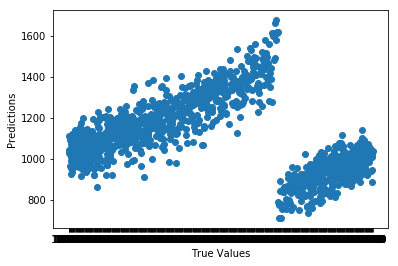

In [32]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [33]:
print('Score:', model.score(X_test, y_test))

Score: 0.8472613718154832


Answer the following questions for the multivariate linear model:
* Is the relationship significant?   
  
Yes, from the R-square, I can know that the relationship is signicant. Because closer to 1 the R-square is, the relationship is more significant. And the R-square of multivariate linear model is about 0.78, so it is effective. 
* Are any model assumptions violated?   
  
Yes. From the heatmap, I can find that it is positive relationship between PT08.S2(NMHC) and PT08.S1(CO), but in the regression model, they obviously have negative relationship.
* Is there any multi-colinearity in the model?   
  
Yes. Based on the heatmap, I can know that   
Positive Correlation: CO(GT) & PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3); PT08.S1(CO) & C6H6(GT), PT08.S2(NMHC), NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3); C6H6(GT) & PT08.S2(NMHC), NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3); PT08.S2(NMHC) & NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3); NOx(GT) & NO2(GT), PT08.S5(O3); NO2(GT) & PT08.S5(O3); PT08.S4(NO2) & T, AH; T & AH.   
And Negative Correlation: CO(GT) & PT08.S3(NOx); PT08.S1(CO) & PT08.S3(NOx); C6H6(GT) & PT08.S3(NOx); PT08.S2(NMHC) & PT08.S3(NOx); NOx(GT) & PT08.S3(NOx); PT08.S3(NOx) & NO2(GT), PT08.S5(O3); T & RH.  
I can predict that there is multi-colinearity in the model. I remove some variables to decrease the influence of the multi-colinearity, like C6H6(GT) and PT08.S2(NMHC).
* In the multiple regression models are predictor variables independent of all the other predictor variables?  
  
After remove some variable, basically, predictor variables are independent of all other predictor variables.
* In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.  
  
I already excluded insignificant variables from the model,and, by the way, from the heatmap, I can rank the most significnat predictor variables.
* Does the model make sense?  
  
Yes, from the summary of linear regression, the r-square is about 0.856, so I can say this model makes sense and effective.
* Cross-validate the model. How well did it do?      
  
After I did cross-validate the model, I get the score is about 0.854, so I think the model is pretty good.

## Part C
#### Generate a logistic model for your data: Find a significant logistic linear model of your choosing in your data. Create a logistic linear model.

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# Adding intercept manually
air_quality_data['intercept'] = 1.0
air_quality_data

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp,RH,AH,Day,Month,intercept
0,2004-03-10,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,3,1.0
1,2004-03-10,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,3,1.0
2,2004-03-10,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,3,1.0
3,2004-03-10,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,3,1.0
4,2004-03-10,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,3,1.0
5,2004-03-11,8,2.0,1333.0,8.0,900.0,174.0,1136.0,112.0,1517.0,1102.0,10.8,57.4,0.7408,Thursday,3,1.0
6,2004-03-11,9,2.2,1351.0,9.5,960.0,129.0,1079.0,101.0,1583.0,1028.0,10.5,60.6,0.7691,Thursday,3,1.0
7,2004-03-11,10,1.7,1233.0,6.3,827.0,112.0,1218.0,98.0,1446.0,860.0,10.8,58.4,0.7552,Thursday,3,1.0
8,2004-03-11,12,1.6,1236.0,5.2,774.0,104.0,1301.0,95.0,1401.0,664.0,9.5,66.8,0.7951,Thursday,3,1.0
9,2004-03-11,13,1.9,1286.0,7.3,869.0,146.0,1162.0,112.0,1537.0,799.0,8.3,76.4,0.8393,Thursday,3,1.0


In [36]:
pred = ["PT08.S5(O3)", "intercept"]
pred

['PT08.S5(O3)', 'intercept']

In [37]:
index = ['CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)']

for i in index:
    air_quality_model = sm.Logit(air_quality_data[i]/air_quality_data[i].max(), air_quality_data[pred]).fit()
    print(air_quality_model.summary2())

Optimization terminated successfully.
         Current function value: 0.382768
         Iterations 6
                         Results: Logit
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: CO(GT)           Pseudo R-squared: 0.086    
Date:               2018-07-05 14:13 AIC:              4467.8410
No. Observations:   5831             BIC:              4481.1829
Df Model:           1                Log-Likelihood:   -2231.9  
Df Residuals:       5829             LL-Null:          -2441.9  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
PT08.S5(O3)      0.0017   0.0001  18.9396 0.0000  0.0015  0.0019
intercept       -3.1012   0.1075 -28.8522 0.0000 -3.3119 -2.8905

Optimization terminated successfully.
         Current function value: 0.3801

#### Cross-validation  
Because the logistic linear model is not good for my dataset, I choose the model has relatively decent R-square, NOx(GT) & PT08.S5(O3).

In [38]:
x = air_quality_data[['NOx(GT)']]
# y = air_quality_data[["PT08.S5(O3)"]]/ air_quality_data[["PT08.S5(O3)"]].max()
temp = []
air_quality_data[["PT08.S5(O3)"]].median()
for i in air_quality_data["PT08.S5(O3)"]:
    if i >= air_quality_data["PT08.S5(O3)"].median():
        temp.append(1)
    else:
        temp.append(0)
y = np.array(temp)
y.shape

(5831,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4664, 1) (4664,)
(1167, 1) (1167,)


In [40]:
# fit a model
lm2 = LogisticRegression()
model = lm2.fit(X_train, y_train)

In [41]:
predictions = lm2.predict(X_test)
predictions[0:5]

array([0, 0, 1, 1, 1])

Text(0,0.5,'Predictions')

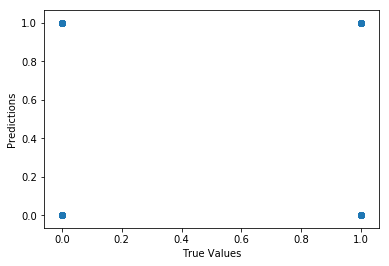

In [42]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [43]:
print('Score:', model.score(X_test, y_test))

Score: 0.7437874892887746


#### Answer the following questions for the logistic linear model:
* Is the relationship significant?  
  
No. I try the all variable in the dataset, but unfortunately I can not find a significant model, because R-squares of all model are less than 0.2. Maybe also because there is no unit interval variables.
* Are any model assumptions violated?   
  
No, I don't think any model assumptions are violated. There is no unit interval variables in this dataset, so the logistic linear model is not suitable for this dataset.
* Cross-validate the model. How well did it do?   
  
After cross-validating the model, I can get the score is about 0.75, which is far more better than the logistic linear model, so it is doing well.